In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score


In [2]:
def compare_models(models, param_grids, X_train, y_train, X_val, y_val, scoring_metric='accuracy'):
    best_models = []
    
    for model, param_grid in zip(models, param_grids):
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2, scoring=scoring_metric)
        grid_search.fit(X_train, y_train)

        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        
        # Store the best model and its parameters
        best_models.append({'model': best_model, 'params': best_params})
    
    # Evaluate the best models on a separate validation set
    best_model_scores = []
    for model_info in best_models:
        best_model = model_info['model']
        y_pred = best_model.predict(X_val)
        
        if scoring_metric == 'accuracy':
            score = accuracy_score(y_val, y_pred)
        elif scoring_metric == 'f1':
            score = f1_score(y_val, y_pred)
        else:
            # Add more evaluation metrics as needed
            pass
        
        best_model_scores.append({'model': best_model, 'score': score})
    
    # Find and return the model with the highest score
    best_model_scores.sort(key=lambda x: x['score'], reverse=True)
    best_model = best_model_scores[0]['model']
    best_score = best_model_scores[0]['score']
    
    return best_model, best_score

In [3]:
ROOT_PATH = Path(Path(os.getcwd())/"../output/features")

In [4]:
experiment              = 2

train_nevus_df = pd.read_csv(ROOT_PATH/f'{experiment}_nevus_train_features.csv',  header = None)
val_nevus_df = pd.read_csv(ROOT_PATH/f'{experiment}_nevus_val_features.csv',  header = None)

train_others_df = pd.read_csv(ROOT_PATH/f'{experiment}_others_train_features.csv',  header = None)
val_others_df = pd.read_csv(ROOT_PATH/f'{experiment}_others_val_features.csv',  header = None)

In [5]:
train_nevus_df.head()


,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,0.003906,0.007669,2.726690,0.018961,6.224777,6.860678,0.003906,0.006373,2.270663,0.014303,...,0.012242,0.009696,0.014340,0.014858,0.019290,0.012548,0.007442,0.070152,0.343077,0.0
1,0.003906,0.005747,1.822312,0.012361,6.733527,2.265433,0.003906,0.005883,2.053812,0.012766,...,0.011919,0.012552,0.013607,0.016100,0.019570,0.019056,0.013730,0.071526,0.415174,0.0
2,0.003906,0.013931,5.165007,0.053592,4.872273,27.933292,0.003906,0.009201,3.452602,0.025577,...,0.009002,0.009044,0.013304,0.017906,0.026760,0.024500,0.012556,0.111250,0.500275,0.0
3,0.003906,0.011025,3.990215,0.035022,5.256297,17.762462,0.003906,0.007055,2.001233,0.016649,...,0.010904,0.011813,0.014083,0.017715,0.023731,0.022302,0.013119,0.089542,0.459750,0.0
4,0.003906,0.009904,4.153651,0.029016,6.010236,17.429094,0.003906,0.008048,3.170752,0.020488,...,0.015281,0.010973,0.017263,0.015887,0.019019,0.010717,0.005879,0.070992,0.334965,0.0


In [6]:
train_others_df.head()

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,0.003906,0.010406,3.020976,0.031626,5.290719,8.456542,0.003906,0.007532,2.632351,0.018428,...,0.022356,0.017174,0.023915,0.019185,0.021370,0.010493,0.006104,0.082130,0.307104,1.0
1,0.003906,0.009334,3.082849,0.026212,5.831955,8.523969,0.003906,0.007291,2.314159,0.017513,...,0.014858,0.014219,0.014783,0.016106,0.018565,0.015171,0.008637,0.059908,0.368733,1.0
2,0.003906,0.006324,2.434205,0.014146,6.746160,5.197432,0.003906,0.005336,1.846683,0.011194,...,0.014656,0.014907,0.015274,0.017330,0.017430,0.015089,0.010200,0.071044,0.340685,1.0
3,0.003906,0.005149,7.893028,0.010692,7.450751,80.155922,0.003906,0.004796,9.524722,0.009795,...,0.014404,0.010617,0.017321,0.011308,0.013490,0.006879,0.004394,0.090385,0.201327,1.0
4,0.003906,0.008509,3.050669,0.022443,6.139508,8.555090,0.003906,0.007055,2.488740,0.016649,...,0.010992,0.011404,0.013635,0.015533,0.018567,0.015725,0.009604,0.088383,0.372506,1.0


In [7]:
val_nevus_df.head()

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,0.003906,0.009898,3.826020,0.028987,5.888416,14.240341,0.003906,0.007293,2.720008,0.017522,...,0.014537,0.015130,0.017296,0.019619,0.022400,0.017667,0.010815,0.081530,0.407893,0.0
1,0.003906,0.008827,2.772055,0.023851,5.823989,7.344466,0.003906,0.007294,2.185178,0.017524,...,0.023293,0.018141,0.023470,0.019156,0.019981,0.010222,0.006019,0.073067,0.293267,0.0
2,0.003906,0.012017,4.631765,0.040874,5.174337,23.165865,0.003906,0.008538,3.301549,0.022570,...,0.016567,0.013588,0.019740,0.018377,0.022090,0.012608,0.007223,0.081842,0.381387,0.0
3,0.003906,0.010259,4.142138,0.030852,5.889486,17.756430,0.003906,0.009562,3.926205,0.027314,...,0.015996,0.011758,0.020967,0.014698,0.019140,0.010165,0.006262,0.141854,0.257581,0.0
4,0.003906,0.013881,4.505620,0.053230,4.757360,20.453058,0.003906,0.006770,2.208872,0.015641,...,0.012200,0.013073,0.014083,0.016200,0.020465,0.019208,0.012606,0.071121,0.441706,0.0


In [8]:
val_others_df.head()

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,0.003906,0.010836,3.842918,0.033964,5.551775,14.526713,0.003906,0.008521,2.860968,0.022496,...,0.012029,0.012292,0.013275,0.015708,0.019275,0.018604,0.013446,0.067421,0.421317,1.0
1,0.003906,0.010824,3.599525,0.033896,5.506119,12.862077,0.003906,0.006934,1.799835,0.016215,...,0.011519,0.011962,0.013373,0.016612,0.021067,0.019481,0.011471,0.079888,0.427846,1.0
2,0.003906,0.006834,3.136613,0.015863,6.620012,12.601744,0.003906,0.006319,3.331821,0.014128,...,0.013656,0.012694,0.014542,0.015088,0.017410,0.013662,0.008002,0.079327,0.313858,1.0
3,0.003906,0.007011,2.863569,0.016489,6.646972,7.229911,0.003906,0.006914,3.316267,0.016144,...,0.013267,0.012746,0.013867,0.015644,0.019252,0.016037,0.009352,0.067767,0.379567,1.0
4,0.003906,0.006948,2.576345,0.016264,6.489248,5.989886,0.003906,0.005640,2.135802,0.012049,...,0.020081,0.013660,0.021402,0.015312,0.018825,0.009675,0.005862,0.085885,0.246921,1.0


In [9]:
# Concatenate the 'nevus' and 'others' dataframes
train_features = pd.concat([train_nevus_df, train_others_df], ignore_index=True)
val_features = pd.concat([val_nevus_df, val_others_df], ignore_index=True)

# Shuffle the dataset
train_features = train_features.sample(frac=1, random_state=42)
val_features = val_features.sample(frac=1, random_state=42)


In [10]:
X_train = train_features.iloc[:,:-1]
y_train = train_features.iloc[:,-1]

X_val = val_features.iloc[:,:-1]
y_val = val_features.iloc[:,-1]

X_val.head()


,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
256,0.003906,0.006272,1.572623,0.013977,6.437156,1.076699,0.003906,0.007604,6.234273,0.018710,...,0.009941,0.010800,0.008596,0.012304,0.013163,0.018037,0.015544,0.012241,0.071930,0.385604
352,0.003906,0.011426,3.688312,0.037331,5.349258,13.292035,0.003906,0.009928,3.242854,0.029140,...,0.013037,0.014996,0.016078,0.017541,0.019559,0.021759,0.018607,0.011252,0.075715,0.408730
298,0.003906,0.011730,3.876435,0.039130,5.283286,14.106763,0.003906,0.011438,4.206819,0.037398,...,0.011062,0.014058,0.011281,0.015725,0.017227,0.021112,0.014852,0.007535,0.076362,0.410627
581,0.003906,0.008048,2.182395,0.020486,5.877913,3.580190,0.003906,0.008111,2.830717,0.020748,...,0.020074,0.025893,0.015607,0.029504,0.019530,0.025285,0.010622,0.006822,0.123589,0.288000
1287,0.003906,0.009970,3.833030,0.029354,5.909434,15.027583,0.003906,0.007197,2.868015,0.017167,...,0.009088,0.011917,0.011219,0.015646,0.016277,0.019704,0.014738,0.008602,0.107954,0.345065


In [11]:
# Standardizing the training data (mean = 0, std = 1)
scaler = StandardScaler()
X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train))
X_val_normalized = pd.DataFrame(scaler.transform(X_val))

In [12]:
# Encoding the label column
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_val_encoded = encoder.transform(y_val)

In [13]:
# Define the list of models and their respective hyperparameter grids
models = [SVC(),
          #LogisticRegression(), 
        KNeighborsClassifier(),
        RandomForestClassifier()] 
        

param_grids = [{'kernel':('linear', 'rbf', 'sigmoid', 'poly'), 'C':[0.1, 1, 10, 100, 1000], 'gamma':[0.001, 0.0001]},
                #{'penalty' : ['l1', 'l2', 'elasticnet', None], 'C':[0.1, 1, 10, 100, 1000], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']},
                {'n_neighbors': [3, 5, 7, 9], 'weights' : ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}, 
                {'n_estimators' : [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
]

# Call the function to compare models and get the best one
best_model, best_score = compare_models(models, param_grids, X_train_normalized, y_train_encoded, X_val_normalized, y_val_encoded, scoring_metric='accuracy')

print("Best Model:", best_model)
print("Best Score:", best_score)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.0

In [14]:
# = {'kernel':('linear', 'rbf', 'sigmoid', 'poly'), 'C':[0.1, 1, 10, 100, 1000], 'gamma':[0.001, 0.0001]}
#svc = SVC()

# Create a GridSearchCV object with a classifier and the parameter grid
#grid_search = GridSearchCV(estimator=svc, param_grid=parameters, cv=10, verbose=10)

# Fit the grid search to your training data
#grid_search.fit(X_train_normalized, y_train_encoded)

# Get the best hyperparameters and the best model
#best_params = grid_search.best_params_
#best_model = grid_search.best_estimator_

In [19]:
# best_params

In [14]:
y_pred = best_model.predict(X_val_normalized)
print(y_pred)

[0 0 0 ... 0 1 1]


### Model evaluation

In [15]:
fpr, tpr, _ = roc_curve(y_val_encoded, y_pred)
roc_auc = auc(fpr, tpr)

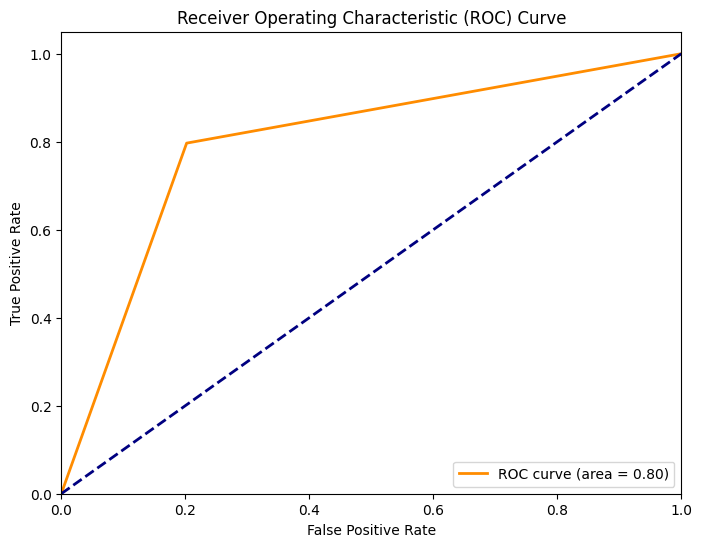

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [17]:
# Calculate accuracy
accuracy = accuracy_score(y_val_encoded, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7972972972972973
